In [4]:
import pandas as pd
import numpy as np

# statement 1

In [5]:
data=pd.read_csv("C:/Users/Hp/Downloads/delivery_time.csv")

In [6]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

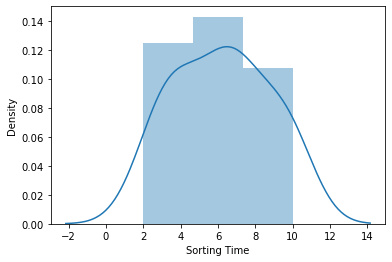

In [11]:
sns.distplot(data['Sorting Time'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

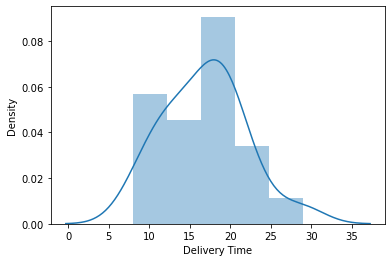

In [12]:
sns.distplot(data['Delivery Time'])
                 

In [13]:
data = data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
import statsmodels.formula.api as smf

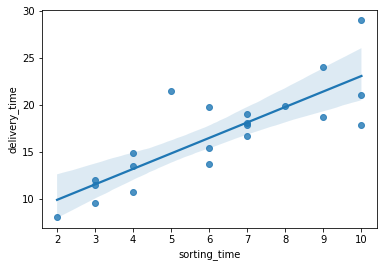

In [15]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'],data=data)
model=smf.ols("delivery_time ~ sorting_time",data=data).fit()
model

In [16]:
model

In [17]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [19]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [20]:
y=(6.582734) +(1.649020)*5

In [21]:
y

14.827834

In [22]:
newtime=pd.Series([2,4,6,8,10])

In [23]:
pred=pd.DataFrame(newtime,columns=['sorting_time'])

pred

,sorting_time
0,2
1,4
2,6
3,8
4,10


In [24]:
model.predict(pred)

0     9.880774
1    13.178814
2    16.476853
3    19.774893
4    23.072933
dtype: float64

# Log transformation

In [25]:
x_log=np.log(data['sorting_time'])
y_log=np.log(data['delivery_time'])

In [26]:
model =smf.ols("y_log~ x_log",data = data).fit()

In [27]:
model

In [29]:
model.param

AttributeError: 'OLSResults' object has no attribute 'param'

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

In [ ]:
y_log=(1.741987) + (0.597522)*5

In [ ]:
y_log

In [ ]:
newtime=pd.Series([2,4,6,8,10])

In [ ]:
pred=pd.DataFrame(newtime,columns=['x_log'])
pred

In [ ]:
model.predict(pred)

In [ ]:
data

# improving model using squareroot tranformation

In [ ]:
data.insert(len(data.columns),'A_sqart',
           np.sqrt(data.iloc[:,0]))
data

In [ ]:
model=smf.ols("delivery_time~a_sqrt",data = data).fit()

In [ ]:
model

In [ ]:
model.params

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

In [ ]:
y_quad=(-3.930699)+(3.977225)*5

In [ ]:
y_quad

In [ ]:
newtime=pd.Series([2,4,6,8,10])

In [ ]:
pred=pd.DataFrame(newtime,columns=['a_sqrt'])
pred

# improving model with square transformation

In [ ]:
data['Squar_del_time']=data.apply(lambda row:row.delivery_time**2,axis =1)
data

In [ ]:
model=smf.ols('Squar_del_time~sorting_time',data=data).fit()

In [ ]:
model

In [ ]:
model.params

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

# improving model with reciprocol transformation

In [ ]:
reciprocal_del_time=1/data["delivery_time"]

In [ ]:
reciprocal_del_time

In [ ]:
model=smf.ols('reciprocal_del_time~sorting_time',data=data).fit()

In [ ]:
model

In [ ]:
model.params

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

# improving model using Box-cox transformation

In [ ]:
from scipy.stats import boxcox
bcx_target, lam=boxcox(data["delivery_time"])

In [ ]:
model=smf.ols('bcx_target~sorting_time',data=data).fit()

In [ ]:
model.params

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

# improving model using Yeo-Johnson Transformation

In [ ]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(data["delivery_time"]) 

In [ ]:
model=smf.ols('yf_target~sorting_time',data=data).fit()

In [ ]:
model.params

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

# The reciprocol transformation is best transformation for this model 

# Statement 2

In [ ]:

salary= pd.read_csv("C:/Users/Hp/Downloads/Salary_Data.csv")


In [ ]:
salary

In [ ]:
salary.info()

In [ ]:
salary.corr()

In [ ]:
import seaborn as sns
sns.distplot(data['Salary'])

In [ ]:
salary=salary.rename({'YearsExperience':'year', 'Salary':'income'},axis=1)

In [ ]:
salary

In [ ]:
sns.regplot(x='year',y='income',data=salary)

In [ ]:
model = smf.ols("income ~ year",data =salary).fit()

In [ ]:
model

In [ ]:
model

In [ ]:
model.params

In [ ]:
print(model.tvalues,'\n',model.pvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

In [ ]:
newsalary=pd.Series([5,10,15,20])

In [ ]:
data_pred=pd.DataFrame(newsalary,columns=['year'])

In [ ]:
data_pred

In [ ]:
model.predict(data_pred)

# improving model using logarithm

In [ ]:
salary1=np.log(salary)

In [ ]:
salary1

In [ ]:
sns.regplot(x='year',y='income',data=salary1)

In [ ]:
model =smf.ols("income ~ year",data=salary1).fit()

In [ ]:
model

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared)

# Improving model using squarroot transformation

In [ ]:
salary.insert(len(salary.columns), 'A_sqrt',
            np.sqrt(salary.iloc[:,0]))
salary

In [ ]:
model=smf.ols('income~A_sqrt',data=salary).fit()

In [ ]:
model

In [ ]:
model.params

In [ ]:
print(model.tvalues,'\n' ,model.pvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

# improving model with square transformation

In [ ]:
salary['Squar_income']= salary.apply(lambda row: row.income**2,  axis=1)
salary

In [ ]:
model=smf.ols('Squar_income~year',data=salary).fit()

In [ ]:
model

In [ ]:
model.params

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

# improving model using BOX-cox transformation

In [ ]:
from scipy.stats import boxcox
bcx_target,lam =boxcox(salary["income"])

In [ ]:
model=smf.ols('bcx_target~year',data=salary).fit()

In [ ]:
model

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)

# improving model using Yeo-Johnson Transformation

In [ ]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(salary["income"]) 

In [ ]:
model=smf.ols('yf_target~year',data=salary).fit()

In [ ]:
model.params

In [ ]:
print(model.pvalues,'\n',model.tvalues)

In [ ]:
(model.rsquared,model.rsquared_adj)